In [3]:
# ! pip install seaborn

In [1]:
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
stimuli1 = 'horizontal'
stimuli2 = 'vertical'

layer = 'L4'

In [7]:
#############################
# Visual Analysis

l4_horizonal_input = f'{stimuli1}/{stimuli1}/{layer}_{stimuli1}.csv'
l4_vertical_input = f'{stimuli2}/{stimuli2}/{layer}_{stimuli2}.csv'

l4_horizontal = pd.read_csv(l4_horizonal_input).sort_values('timestamps')
l4_vertical = pd.read_csv(l4_vertical_input).sort_values('timestamps')

In [10]:
#########################################
# Visualize firing w population grouping

rel = sns.relplot(data=l4_horizontal, x='timestamps', y='node_id', hue='pop_name', aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli1}')
plt.savefig('RasterL4Horizontal.png', bbox_inches='tight')

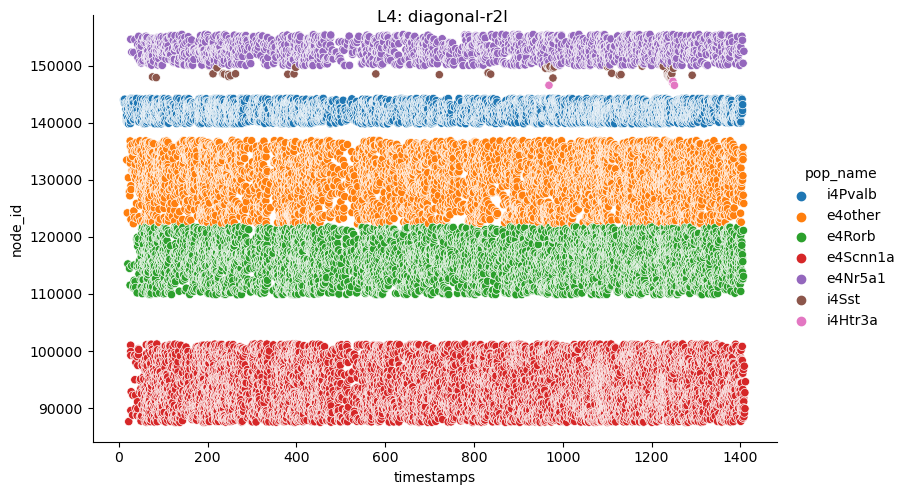

In [5]:
rel = sns.relplot(data=l4_vertical, x='timestamps', y='node_id', hue='pop_name', aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli2}')
plt.show()

In [7]:
#########################################
# Account for population type differences

l4_horizontal_populations = l4_horizontal['pop_name'].unique().tolist()
l4_vertical_populations = l4_vertical['pop_name'].unique().tolist()

difference = list(set(l4_horizontal_populations) - set(l4_vertical_populations))
difference2 = list(set(l4_vertical_populations) - set(l4_horizontal_populations))

if difference:
    for pop in difference:
        l4_horizontal = l4_horizontal[l4_horizontal.pop_name != pop]
        l4_vertical = l4_vertical[l4_vertical.pop_name != pop]
if difference2:
    for pop in difference2:
        l4_horizontal = l4_horizontal[l4_horizontal.pop_name != pop]
        l4_vertical = l4_vertical[l4_vertical.pop_name != pop]


In [8]:
############################################
# Normalize between common min max timesteps

mins = [l4_horizontal['timestamps'].min(), l4_vertical['timestamps'].min()]
maxs = [l4_horizontal['timestamps'].max(), l4_vertical['timestamps'].max()]

analysis_min = max(mins)
analysis_max = min(maxs)

In [9]:
print(mins)
print(maxs)

[12.5, 10.0]
[1404.25, 1405.75]


In [10]:
#########################
# Change timestamp bounds

l4_horizontal = l4_horizontal.loc[(l4_horizontal['timestamps'] >= analysis_min) & (l4_horizontal['timestamps'] <= analysis_max)]
l4_vertical = l4_vertical.loc[(l4_vertical['timestamps'] >= analysis_min) & (l4_vertical['timestamps'] <= analysis_max)]

l4_horizontal.iloc[-1, l4_horizontal.columns.get_loc('timestamps')] = analysis_max
l4_horizontal.iloc[0, l4_horizontal.columns.get_loc('timestamps')] = analysis_min

l4_vertical.iloc[-1, l4_vertical.columns.get_loc('timestamps')] = analysis_max
l4_vertical.iloc[0, l4_vertical.columns.get_loc('timestamps')] = analysis_min

In [11]:
####################
# Convert into bins

l4_horizontal['timestamp bins'] = pd.cut(l4_horizontal['timestamps'], bins=100).astype(str)
l4_vertical['timestamp bins'] = pd.cut(l4_vertical['timestamps'], bins=100).astype(str)

In [30]:
l4_horizontal

,timestamps,population,node_id,node_type_id,tuning_angle,x,y,z,pop_name,timestamp bins
7297,12.50,v1,156567,475585413,116.004756,-407.806953,-60.380389,-561.160400,i1Htr3a,"(11.108, 26.418]"
5549,12.75,v1,155508,475585413,2.675386,540.055426,-53.707461,-263.421272,i1Htr3a,"(11.108, 26.418]"
6671,12.75,v1,156991,475585413,161.379310,547.148956,-83.841204,-549.268705,i1Htr3a,"(11.108, 26.418]"
3542,12.75,v1,158284,475585413,299.750297,-627.976993,-82.724831,243.721760,i1Htr3a,"(11.108, 26.418]"
7624,13.00,v1,156545,475585413,113.650416,810.115564,-56.237946,-213.074132,i1Htr3a,"(11.108, 26.418]"
...,...,...,...,...,...,...,...,...,...,...
7786,1403.25,v1,159141,478107198,105.945946,183.720558,-53.692325,-339.517664,i1Htr3a,"(1390.332, 1404.25]"
2388,1403.50,v1,158799,475585413,354.863258,-575.883283,-79.606173,571.900583,i1Htr3a,"(1390.332, 1404.25]"
2869,1403.50,v1,159269,475585413,152.072072,-16.923732,-74.417976,327.764451,i1Htr3a,"(1390.332, 1404.25]"
3249,1403.75,v1,158397,475585413,311.843044,430.077383,-77.004072,-703.955977,i1Htr3a,"(1390.332, 1404.25]"


In [12]:
hue_order = l4_horizontal['pop_name'].unique().tolist()

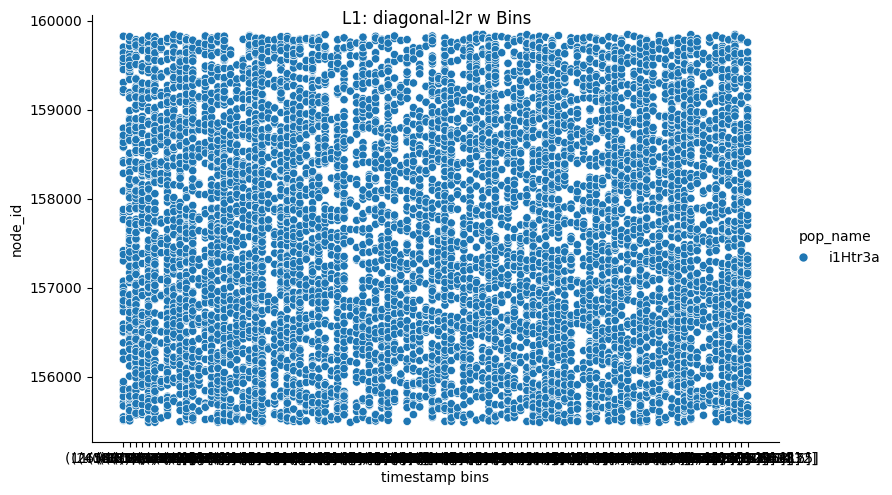

In [13]:
rel = sns.relplot(data=l4_horizontal, x='timestamp bins', y='node_id', hue='pop_name', hue_order=hue_order, aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli1} w Bins')
plt.show()

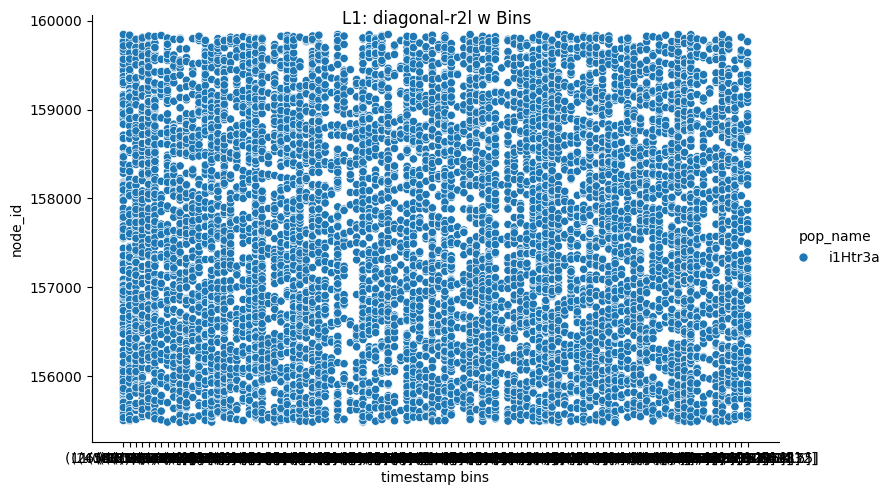

In [14]:
rel = sns.relplot(data=l4_vertical, x='timestamp bins', y='node_id', hue='pop_name', hue_order=hue_order, aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli2} w Bins')
plt.show()

In [15]:
#####################
# The statistics


In [16]:
timestamps = l4_vertical['timestamp bins'].unique().tolist()
pop_names = l4_horizontal['pop_name'].unique().tolist()

In [17]:
pop_names

['i1Htr3a']

In [18]:
column_names = pop_names.copy()
column_names[:0] = ['timestamp bins']

statistical_horizontal = pd.DataFrame(columns=column_names)
statistical_vertical = pd.DataFrame(columns=column_names)

In [19]:
for timestamp in timestamps:

    line_horizontal = [timestamp]
    line_vertical = [timestamp]

    l4_horizontal_bin = l4_horizontal.loc[l4_horizontal['timestamp bins'] == timestamp]
    l4_vertical_bin = l4_vertical.loc[l4_vertical['timestamp bins'] == timestamp]

    for population in pop_names:
        horizontal_counts = len(l4_horizontal_bin[l4_horizontal_bin.pop_name == population])
        vertical_counts = len(l4_vertical_bin[l4_vertical_bin.pop_name == population])
        
        line_horizontal.append(horizontal_counts)
        line_vertical.append(vertical_counts)

    statistical_horizontal.loc[len(statistical_horizontal)] = line_horizontal
    statistical_vertical.loc[len(statistical_vertical)] = line_vertical

In [20]:
statistical_horizontal['Total Firing'] = statistical_horizontal.iloc[:, 1:].sum(axis=1)
statistical_vertical['Total Firing'] = statistical_vertical.iloc[:, 1:].sum(axis=1)

In [21]:
statistical_horizontal

,timestamp bins,i1Htr3a,Total Firing
0,"(11.108, 26.418]",65,65
1,"(26.418, 40.335]",129,129
2,"(40.335, 54.252]",132,132
3,"(54.252, 68.17]",89,89
4,"(68.17, 82.088]",108,108
...,...,...,...
95,"(1334.663, 1348.58]",103,103
96,"(1348.58, 1362.498]",117,117
97,"(1362.498, 1376.415]",115,115
98,"(1376.415, 1390.332]",123,123


In [22]:
# statistical_horizontal.iloc[:, 1:]

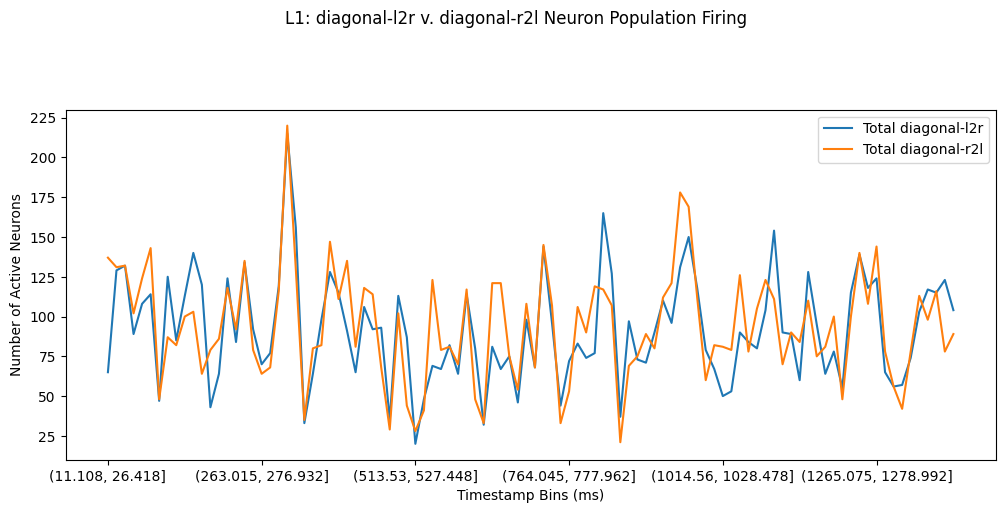

In [23]:

fig = plt.figure(figsize=(12,10))
fig.tight_layout(pad=5.0)
st = fig.suptitle(f"{layer}: {stimuli1} v. {stimuli2} Neuron Population Firing")
ax1 = fig.add_subplot(211)


ax1.plot(statistical_horizontal['Total Firing'], label=f'Total {stimuli1}')
ax1.plot(statistical_vertical['Total Firing'], label=f'Total {stimuli2}')

# ax1.plot(statistical_horizontal['i4Pvalb'], label='i4Pvalb')
# ax1.plot(statistical_horizontal['e4Rorb'], label='e4Rorb')
# ax1.plot(statistical_horizontal['e4Scnn1a'], label='e4Scnn1a')
# ax1.plot(statistical_horizontal['e4other'], label='e4other')
# ax1.plot(statistical_horizontal['e4Nr5a1'], label='e4Nr5a1')
# ax1.plot(statistical_horizontal['i4Sst'], label='i4Sst')


ax1.set_xticks(range(0, statistical_horizontal.shape[0], 18))
ax1.set_xticklabels(statistical_horizontal['timestamp bins'].loc[::18])
ax1.set_xlabel('Timestamp Bins (ms)')
ax1.set_ylabel('Number of Active Neurons')

ax1.legend(loc='best')

# ax.plot(x,y)
# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(statistical_horizontal['Total Firing'], statistical_vertical['Total Firing']))

In [28]:
rmse

23.248225738752623

In [29]:
stimuli2

'diagonal-r2l'

In [1228]:
analysis_results = pd.read_csv('analysis_results.csv')

column_name = layer + ' RMSE'

analysis_results.loc[(analysis_results['stimuli1'] == stimuli1) & (analysis_results['stimuli2'] == stimuli2), column_name] = rmse

analysis_results.to_csv('analysis_results.csv', index=False)

In [1229]:
analysis_results

,stimuli1,stimuli2,L1 RMSE,L23 RMSE,L4 RMSE,L5 RMSE,L6 RMSE,L2 RMSE
0,horizontal,vertical,23.138064,150.678908,96.671764,96.098172,151.120616,NaN
1,horizontal,diagonal-l2r,21.894520,130.671554,92.627642,93.956443,143.854300,NaN
2,horizontal,diagonal-r2l,21.364690,109.220114,93.972443,88.247354,142.649794,NaN
3,vertical,diagonal-l2r,23.161174,143.870554,103.659105,101.239063,158.681097,NaN
4,vertical,diagonal-r2l,25.469393,165.827018,104.404023,113.904626,167.268848,25.469393
5,diagonal-l2r,diagonal-r2l,23.248226,124.345161,93.868845,103.077907,148.267789,NaN


In [31]:
# ! pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 455.3 kB/s eta 0:00:00m eta 0:00:010:00:01


In [36]:
from dtaidistance import dtw

distance = dtw.distance(statistical_horizontal['Total Firing'].values, statistical_vertical['Total Firing'].values)
print(distance)


193.4605903020044


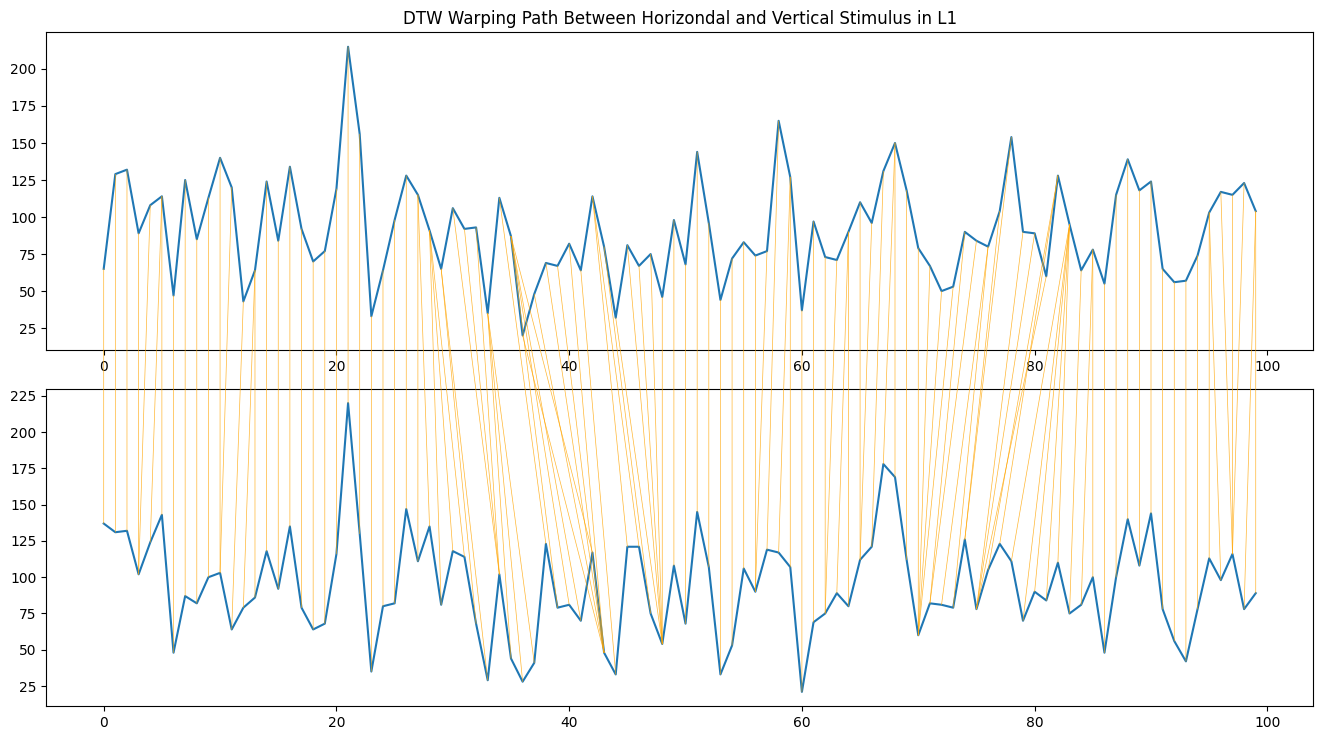

In [37]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

fig, ax = plt.subplots(2,1,figsize=(1280/96, 720/96))
path = dtw.warping_path(statistical_horizontal['Total Firing'].values, statistical_vertical['Total Firing'].values)
dtwvis.plot_warping(statistical_horizontal['Total Firing'].values, statistical_vertical['Total Firing'].values, path, 
                    fig=fig, axs=ax)
ax[0].set_title('DTW Warping Path Between Horizondal and Vertical Stimulus in L1')
fig.tight_layout()